In [4]:
#Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [6]:
songs=pd.read_csv('songsDataset.csv')

# **Exploratory Data Analysis**

In [7]:
songs.head()

,'userID','songID','rating'
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5


In [8]:
songs.shape

(2000000, 3)

In [9]:
songs.columns

Index([''userID'', ''songID'', ''rating''], dtype='object')

<Axes: >

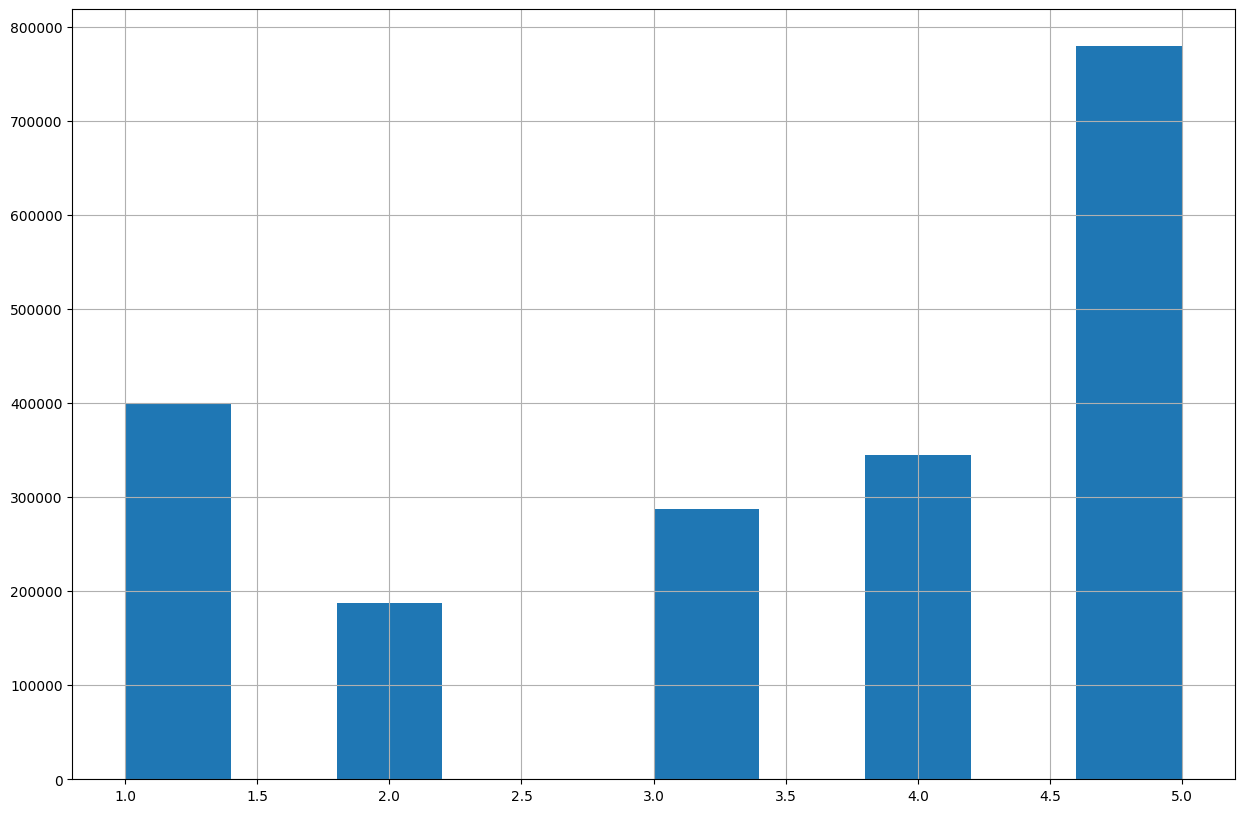

In [10]:
plt.figure(figsize=(15,10))
songs["'rating'"].hist()

In [11]:
songs.isnull().sum()

'userID'    0
'songID'    0
'rating'    0
dtype: int64

In [12]:
songs.nunique()

'userID'    200000
'songID'    127771
'rating'         5
dtype: int64

In [16]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   'userID'  int64
 1   'songID'  int64
 2   'rating'  int64
dtypes: int64(3)
memory usage: 45.8 MB


# **Pre-processing**

In [20]:
songsp=songs.transpose()
songsp.head()

,0,1,2,3,4,5,6,7,8,9,...,1999990,1999991,1999992,1999993,1999994,1999995,1999996,1999997,1999998,1999999
'userID',0,0,0,0,0,0,0,0,0,0,...,199999,199999,199999,199999,199999,199999,199999,199999,199999,199999
'songID',7171,8637,21966,35821,82446,90409,107410,131919,132685,136507,...,21651,23179,45954,63948,68445,75840,85921,116763,128758,129321
'rating',5,4,4,5,5,5,5,5,3,3,...,5,1,5,1,5,2,1,1,1,1


In [21]:
songstrain=songs.drop(labels=range(10000,2000000),axis=0)
songstrain.shape

(10000, 3)

In [22]:
songsp = songstrain.pivot_table(index=["'userID'"],columns=["'songID'"],values="'rating'")
songsp.head()

'songID',4,34,45,66,69,98,107,115,191,208,...,136507,136571,136586,136592,136623,136686,136714,136716,136719,136728
'userID',,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
songsp.shape

(1000, 7389)

In [24]:
print("Before: ",songsp.shape)
songsp = songsp.dropna(thresh=10, axis=1).fillna(0,axis=1)

#userRatings.fillna(0, inplace=True)
print("After: ",songsp.shape)

Before:  (1000, 7389)
After:  (1000, 13)


In [25]:
songsp

'songID',911,2726,22763,24427,48731,51615,54042,56660,62954,63101,68572,72017,86341
'userID',,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
corrMatrix = songsp.corr(method='pearson')
corrMatrix.head(10)

'songID',911,2726,22763,24427,48731,51615,54042,56660,62954,63101,68572,72017,86341
'songID',,,,,,,,,,,,,
911,1.000000,-0.010780,0.126448,-0.009617,0.084891,-0.009479,-0.009177,-0.009177,-0.008702,-0.008620,0.128600,-0.009090,-0.010282
2726,-0.010780,1.000000,-0.010945,-0.011180,-0.011063,-0.011020,-0.010668,-0.010668,0.012364,-0.010020,-0.010482,-0.010567,0.134407
22763,0.126448,-0.010945,1.000000,-0.009765,-0.009663,-0.009625,-0.009318,-0.009318,0.102726,0.087691,0.047754,0.111718,-0.010440
24427,-0.009617,-0.011180,-0.009765,1.000000,-0.009870,-0.009832,-0.009518,-0.009518,-0.009025,-0.008940,-0.009352,-0.009428,0.011099
48731,0.084891,-0.011063,-0.009663,-0.009870,1.000000,-0.009728,-0.009418,-0.009418,-0.008930,-0.008846,-0.009253,0.074714,-0.010552
51615,-0.009479,-0.011020,-0.009625,-0.009832,-0.009728,1.000000,-0.009381,-0.009381,-0.008896,-0.008812,-0.009217,-0.009292,-0.010511
54042,-0.009177,-0.010668,-0.009318,-0.009518,-0.009418,-0.009381,1.000000,0.034041,-0.008612,0.039340,-0.008923,-0.008996,0.005207
56660,-0.009177,-0.010668,-0.009318,-0.009518,-0.009418,-0.009381,0.034041,1.000000,-0.008612,0.157173,0.008677,-0.008996,-0.010175
62954,-0.008702,0.012364,0.102726,-0.009025,-0.008930,-0.008896,-0.008612,-0.008612,1.000000,-0.008089,-0.008462,-0.008530,-0.009649


# **Model Building**

In [27]:
def get_similar(songID,rating):
    similar_ratings = corrMatrix[songID]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)

    #print(type(similar_ratings))
    return print('The following recomendation list is as follows:\n',similar_ratings)

In [28]:
playlist_1 = [(911,4)]
similar_songs = pd.DataFrame()
for songID,rating in playlist_1:
  similar_songs = similar_songs.append(get_similar(songID,rating),ignore_index = True)

similar_songs.head()

The following recomendation list is as follows:
 'songID'
911      1.500000
68572    0.192900
22763    0.189671
48731    0.127336
63101   -0.012929
62954   -0.013053
72017   -0.013635
56660   -0.013765
54042   -0.013765
51615   -0.014219
24427   -0.014426
86341   -0.015423
2726    -0.016169
Name: 911, dtype: float64


<ipython-input-28-55cd9f7f5d55>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_songs = similar_songs.append(get_similar(songID,rating),ignore_index = True)


""


*Project by Yash Rayththa*